In [1]:
%matplotlib inline
# imports basicos
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize, getfigs


#from sklearn.preprocessing import Imputer
from matplotlib.colors import ListedColormap

# ggplot
#from ggplot import *

# Deixa os graficos com uma cara mais bonita
pd.set_option('display.mpl_style', 'default')
figsize(18, 5)
pd.set_option('display.max_columns',300)
pd.set_option('display.width', 4000)


In [2]:
from itertools import count
import math
import random

def sine_wave(frequency=440.0, framerate=44000, amplitude=1.0):
    if amplitude > 1.0:
        amplitude = 1.0
    if amplitude < 0.0:
        amplitude = 0.0
    frequency = float(frequency)
    return (amplitude * math.sin(2.0 * math.pi * frequency * (float(i) / framerate)) for i in
            count(0))

def sine_wave_array(size, frequency=440.0, framerate=44000, amplitude=1.0):
    wave = sine_wave(frequency=frequency, framerate=framerate, amplitude=amplitude)
    return [wave.next() for _ in xrange(size)]

def wave_array(size, functions):
    norm = len(functions)
    return [sum((f.next() for f in functions))/norm for _ in xrange(size)]

def white_noise(amplitude=0.5):
    return (float(amplitude) * random.uniform(-1, 1) for _ in count(0))

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['monospace'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=medium. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


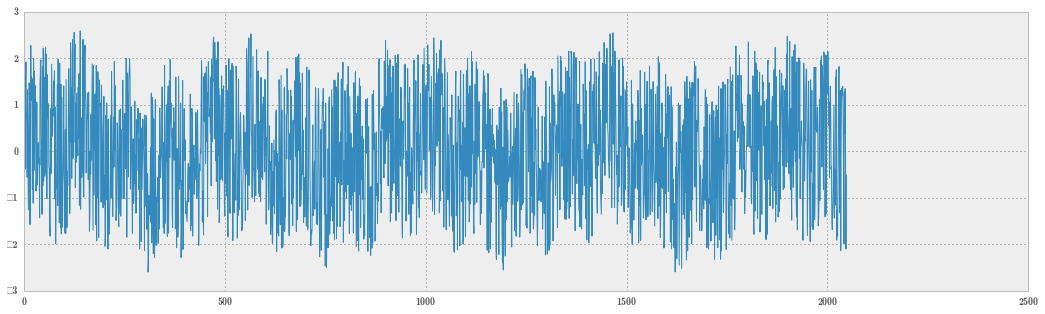

In [3]:
x1 = sine_wave(frequency=100, framerate=44000, amplitude=1.0)
x2 = sine_wave(frequency=400, framerate=44000, amplitude=1.0)
n = white_noise(amplitude=6)
x = wave_array(2048,[x1,x2,n])
plt.figure()
plt.plot(x)

CPU times: user 348 µs, sys: 56 µs, total: 404 µs
Wall time: 407 µs


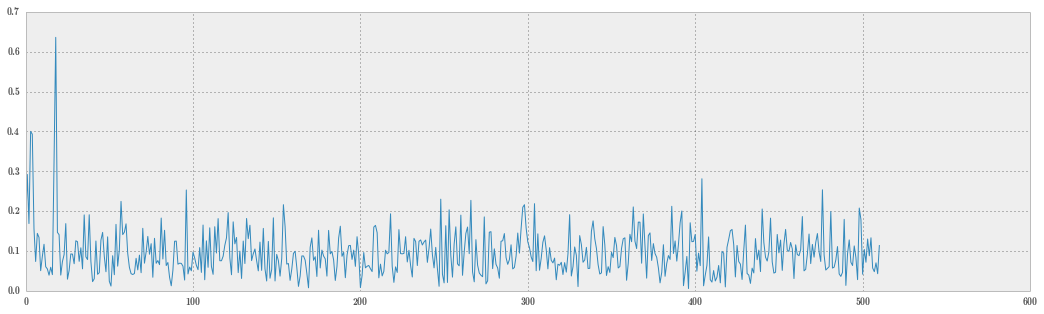

In [4]:
%time f = np.fft.rfft(x)
n = len(f)/2
fa = [abs(x)/n for x in f[1:len(f)/2]]
plt.figure()
plt.plot(fa)

In [5]:
tpsw_n = 10
tpsw_m = 3

In [6]:
def average(x):
    return sum(x)/len(x)

In [7]:
# teste
# fa = range(100)
lfa= len(fa)
out = []
for i in range(len(fa)):
    ll = max(i-tpsw_n,0)
    lh = max(i-tpsw_m,0)
    hl = min(i+tpsw_m,lfa)    
    hh = min(i+tpsw_n,lfa)
    window = fa[ll:lh] + fa[hl:hh]
    #print(window)
    out.append(fa[i]/ average(window))

In [8]:
def tpsw(x, n=10, m=3):
    lfa= len(x)
    out = []
    for i in range(len(x)):
        ll = max(i-n,0)
        lh = max(i-m,0)
        hl = min(i+m,lfa)    
        hh = min(i+n,lfa)
        window = x[ll:lh] + x[hl:hh]
        #print(window)
        out.append(fa[i]/ average(window))
    return out

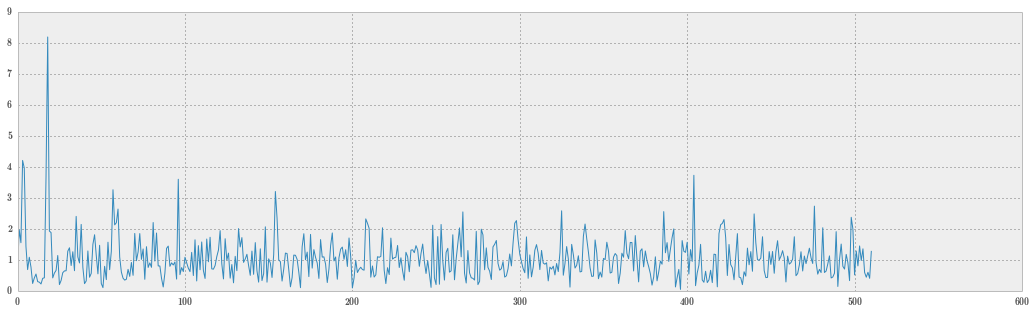

In [9]:
out = tpsw(fa)
plt.figure()
plt.plot(out)

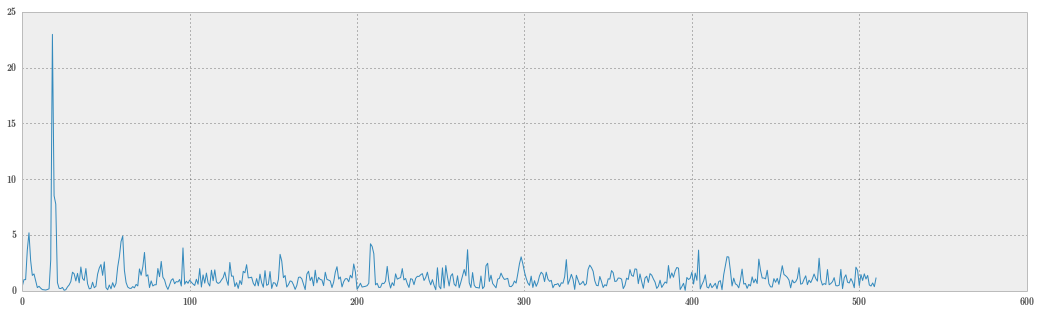

In [10]:
for _ in range(10):
    out = tpsw(out,8,3)
plt.figure()
plt.plot(out)

# PEAK DETECTION'

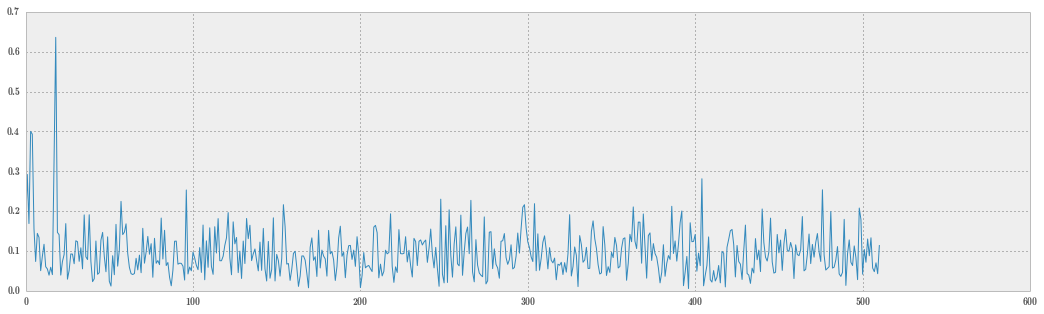

In [20]:
plt.figure()
plt.plot(fa)

In [21]:
fa_mean = np.mean(fa)
fa_std = np.std(fa)
print(fa_mean)
print(fa_std)

0.0956222165711
0.0597516251476


In [66]:
def mean_filter(x):
    fa_mean = np.mean(fa)
    fa_std = np.std(fa)
    out = []
    for i in x:
        v = (i - fa_mean)/fa_std
        out.append(v)
    return out

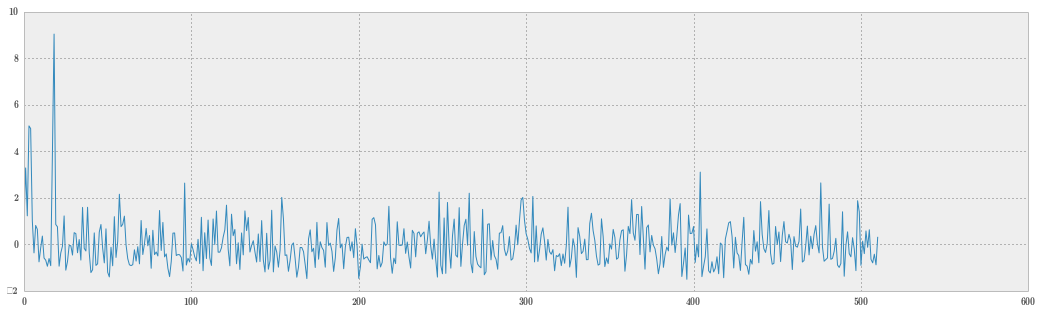

In [67]:
plt.figure()
a = mean_filter(fa)
out = []
plt.plot(a)

# PEAK DETECTION'

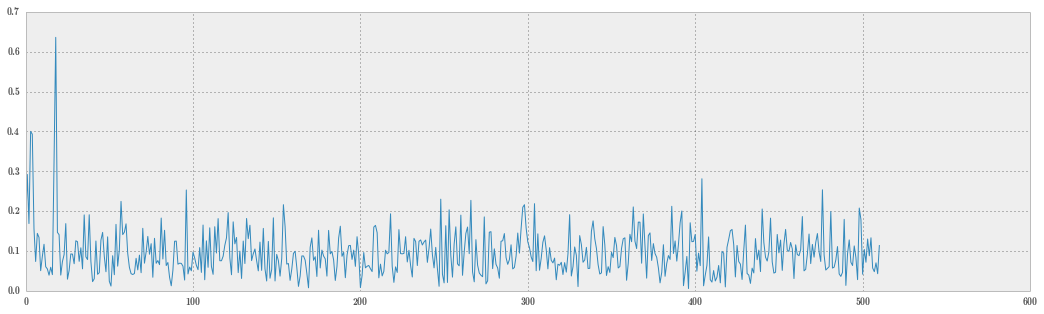

In [13]:
plt.figure()
plt.plot(fa)

Detect peaks without any filters.
Peaks are: [ 2  6  9 17 22]


/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=x-large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=large. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


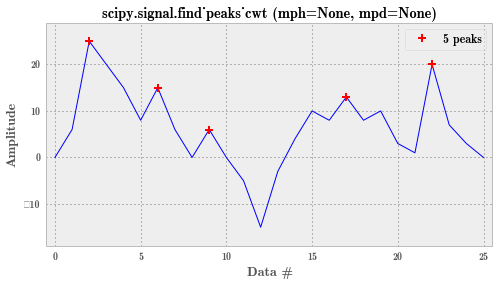

In [14]:


import numpy as np

vector = [
    0, 6, 25, 20, 15, 8, 15, 6, 0, 6, 0, -5, -15, -3, 4, 10, 8, 13, 8, 10, 3,
    1, 20, 7, 3, 0 ]

def plot_peaks(x, indexes, algorithm=None, mph=None, mpd=None):
    """Plot results of the peak dectection."""
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print('matplotlib is not available.')
        return
    _, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.plot(x, 'b', lw=1)
    if indexes.size:
        label = 'peak'
        label = label + 's' if indexes.size > 1 else label
        ax.plot(indexes, x[indexes], '+', mfc=None, mec='r', mew=2, ms=8,
                label='%d %s' % (indexes.size, label))
        ax.legend(loc='best', framealpha=.5, numpoints=1)
    ax.set_xlim(-.02*x.size, x.size*1.02-1)
    ymin, ymax = x[np.isfinite(x)].min(), x[np.isfinite(x)].max()
    yrange = ymax - ymin if ymax > ymin else 1
    ax.set_ylim(ymin - 0.1*yrange, ymax + 0.1*yrange)
    ax.set_xlabel('Data #', fontsize=14)
    ax.set_ylabel('Amplitude', fontsize=14)
    ax.set_title('%s (mph=%s, mpd=%s)' % (algorithm, mph, mpd))
    plt.show()
    

import scipy.signal

print('Detect peaks without any filters.')
indexes = scipy.signal.find_peaks_cwt(vector, np.arange(1, 4),
    max_distances=np.arange(1, 4)*2)
indexes = np.array(indexes) - 1
print('Peaks are: %s' % (indexes))
plot_peaks(np.array(vector), np.array(indexes),
    algorithm='scipy.signal.find_peaks_cwt')

Peaks are: [1, 3, 4, 18, 39, 46, 58, 59, 73, 83, 90, 97, 121, 125, 133, 148, 155, 161, 171, 182, 188, 199, 209, 218, 233, 249, 254, 265, 274, 278, 279, 286, 298, 304, 310, 311, 325, 332, 339, 340, 346, 358, 370, 373, 386, 387, 392, 398, 399, 404, 408, 417, 422, 430, 441, 445, 464, 476, 477, 481, 489, 499]


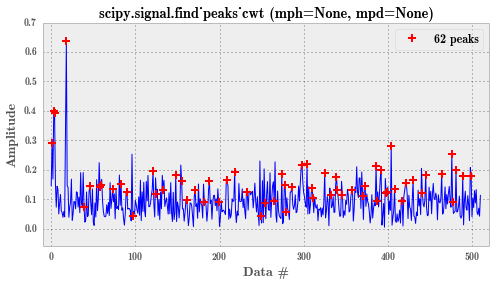

In [17]:
indexes = scipy.signal.find_peaks_cwt(fa, np.arange(1,3))
print('Peaks are: %s' % (indexes))
plot_peaks(np.array(fa), np.array(indexes),
    algorithm='scipy.signal.find_peaks_cwt')